In [1]:
#Import the library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = ['#B3CDE3','#FBB4AE']
sns.set_palette(custom_palette)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the dataset

train=pd.read_csv("../input/titanic/train.csv")
test=pd.read_csv("../input/titanic/test.csv")
submission = pd.read_csv("../input/titanic/gender_submission.csv")


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Data Exploration

def basic_eda(train,test):
    print("------------------------------------Train HEAD------------------------------------")
    print(train.head())
    print("------------------------------------Test HEAD ------------------------------------")
    print(test.head())
    print("------------------------------------Train INFO------------------------------------")
    print(train.info())
    print("------------------------------------Test INFO ------------------------------------")
    print(test.info())
    print("------------------------------------Train Describe--------------------------------")
    print(train.describe())
    print("------------------------------------Test Describe --------------------------------")
    print(test.describe())
    print("------------------------------------Train Columns---------------------------------")
    print(train.columns)
    print("------------------------------------Test Columns ---------------------------------")
    print(test.columns)
    print("------------------------------------Train Data Types------------------------------")
    print(train.dtypes)
    print("------------------------------------Test Data Types ------------------------------")
    print(test.dtypes)
    print("------------------------------------Train Missing Values--------------------------")
    print(train.isnull().sum())
    print("------------------------------------Test Missing Values --------------------------")
    print(test.isnull().sum())
    print("------------------------------------Train NULL values-----------------------------")
    print(train.isna().sum())
    print("------------------------------------Test NULL values -----------------------------")
    print(test.isna().sum())
    print("------------------------------------Train Shape Of Data---------------------------")
    print(train.shape)
    print("------------------------------------Test Shape Of Data ---------------------------")
    print(test.shape)

In [5]:
#Data Exploration

basic_eda(train,test)

------------------------------------Train HEAD------------------------------------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            11380

In [6]:
data = [train,test]
for i in data :
    i['Status'] = i['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    i['FamilySize'] = i ['SibSp'] + i['Parch'] + 1
    i.Age= i.Age.fillna(i.Age.mean())
    #i.dropna(subset=['Age','Fare'],inplace=True)
    i.Embarked=i.Embarked.fillna('S')
    i.Fare= i.Fare.fillna(i.Fare.mean())

    i.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace=True)

In [7]:
for x in data:
    x['Status'] = x['Status'].replace(['Lady', 'Countess','Capt', 'Col',\
                                       'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    x['Status'] = x['Status'].replace('Mlle', 'Miss')
    x['Status'] = x['Status'].replace('Ms', 'Miss')
    x['Status'] = x['Status'].replace('Mme', 'Mrs')

In [8]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Status,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,1


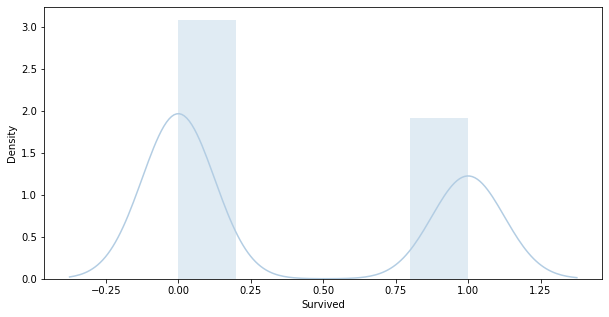

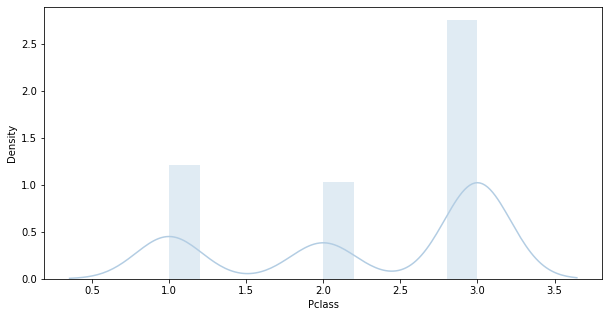

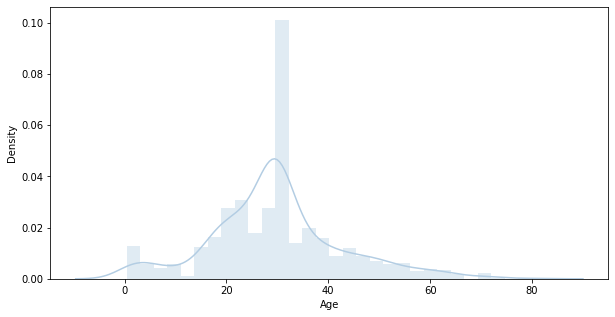

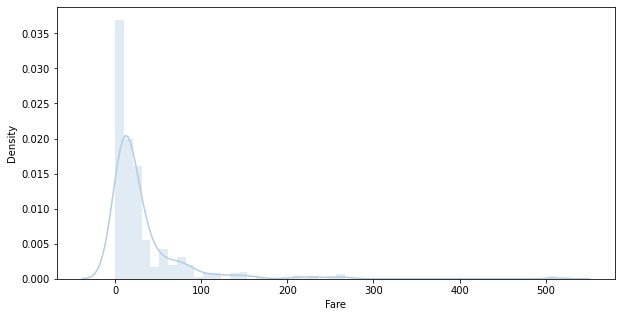

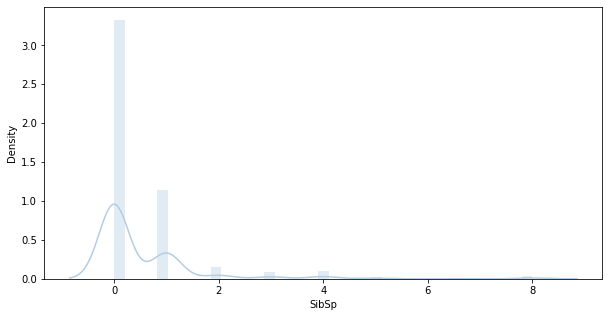

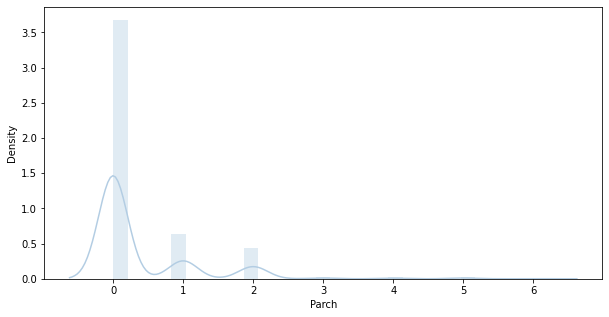

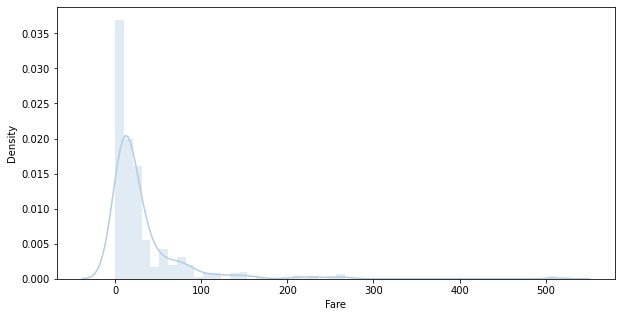

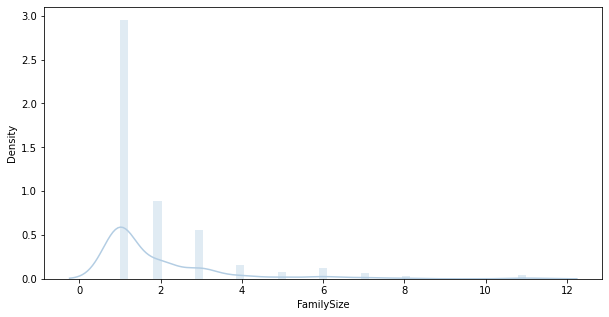

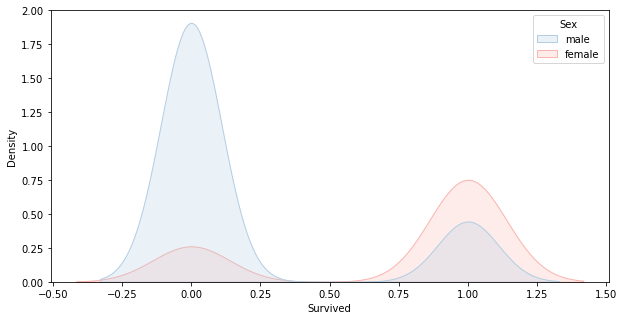

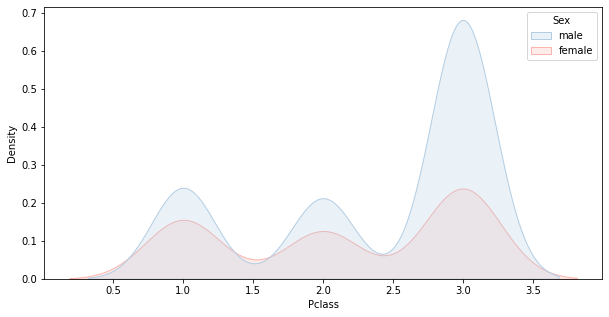

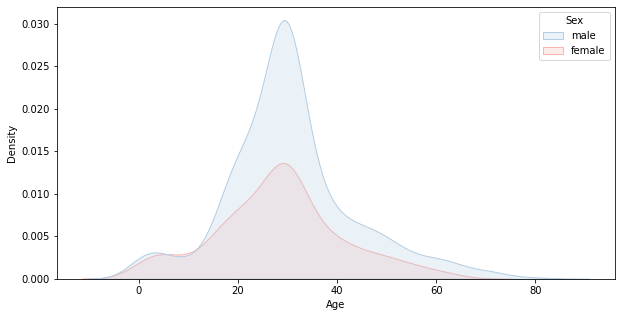

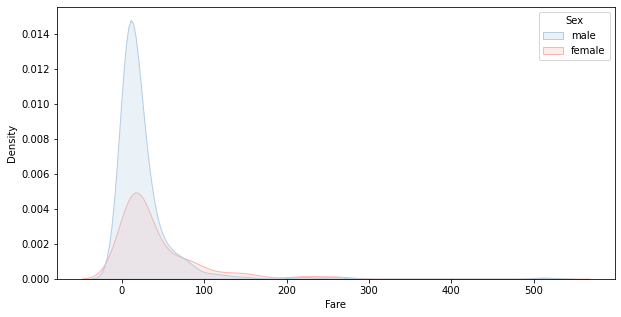

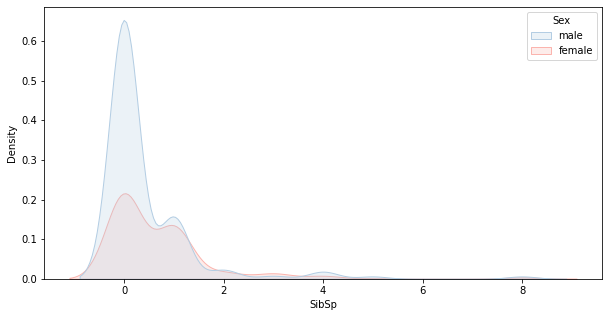

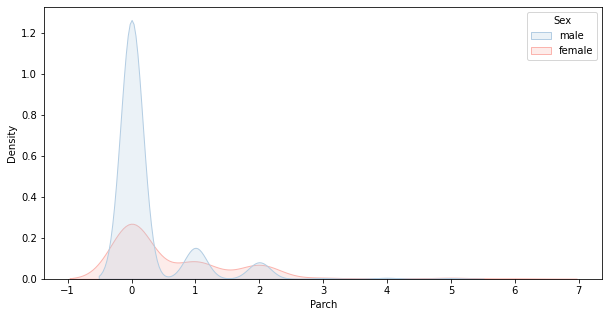

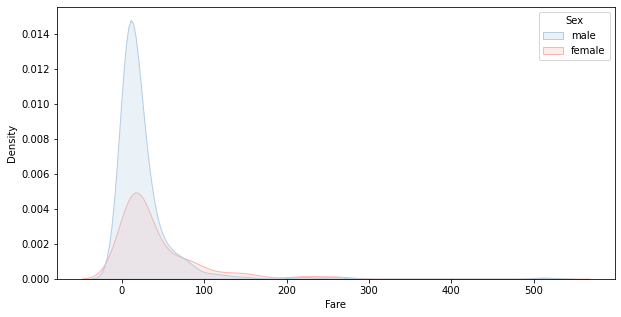

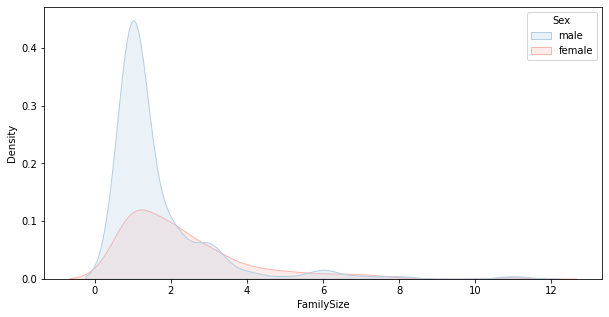

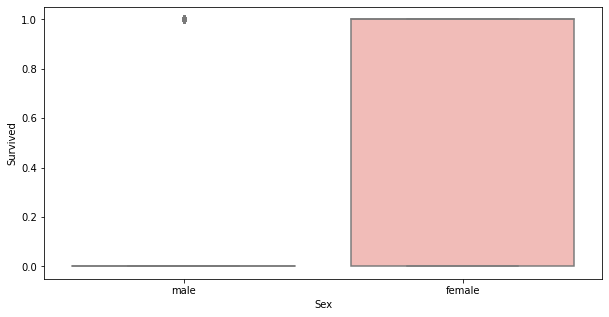

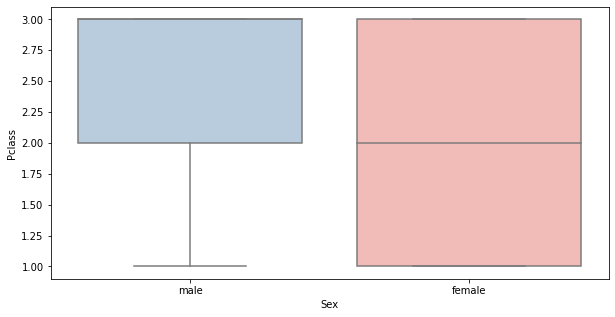

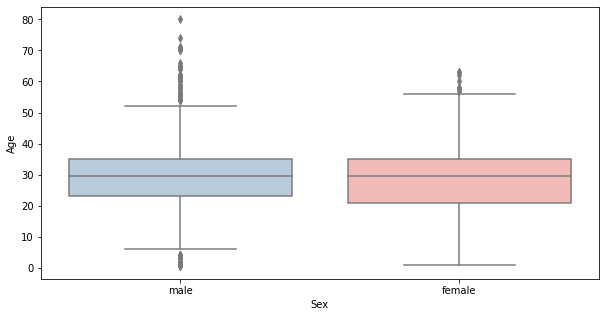

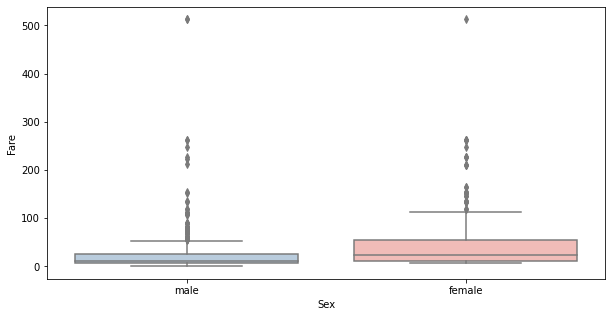

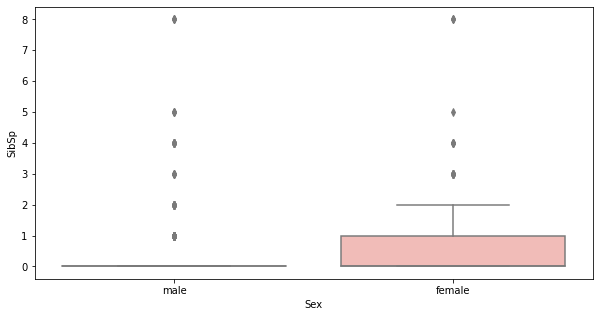

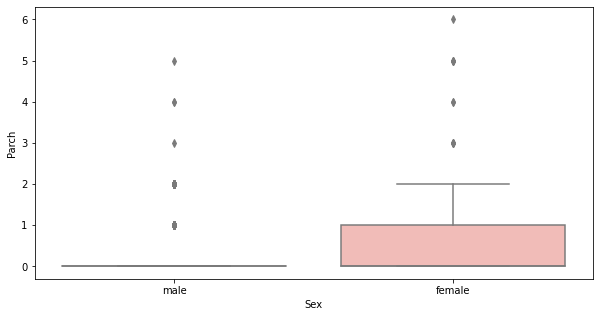

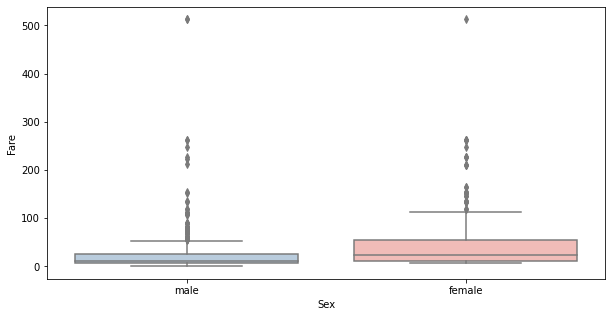

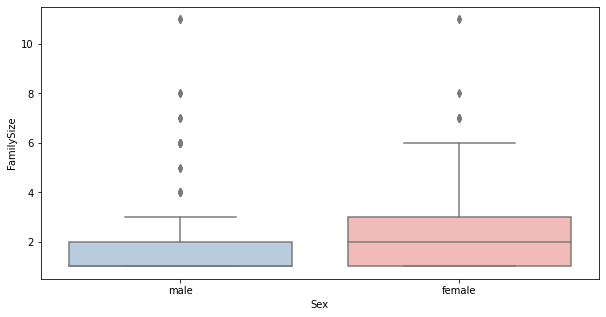

<Figure size 720x360 with 0 Axes>

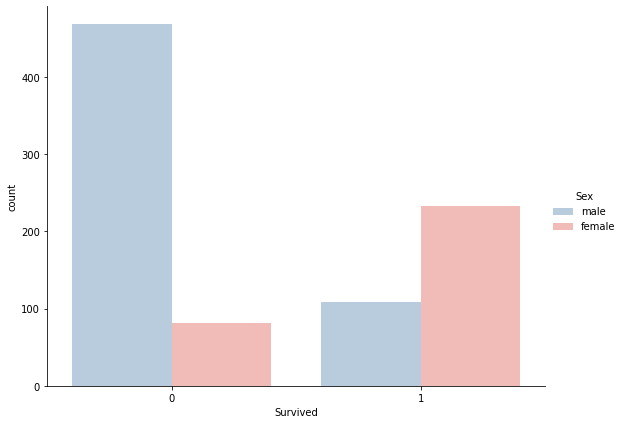

<Figure size 720x360 with 0 Axes>

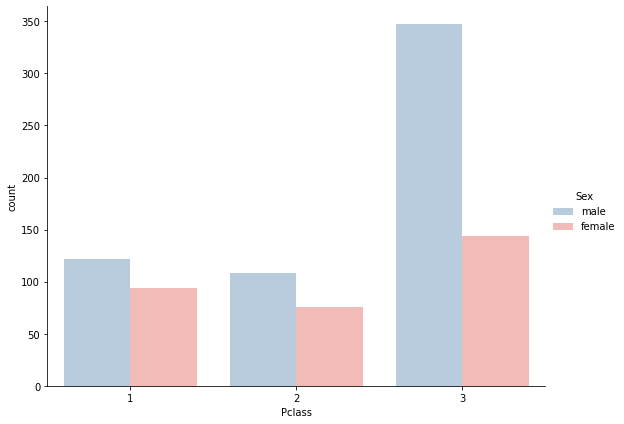

<Figure size 720x360 with 0 Axes>

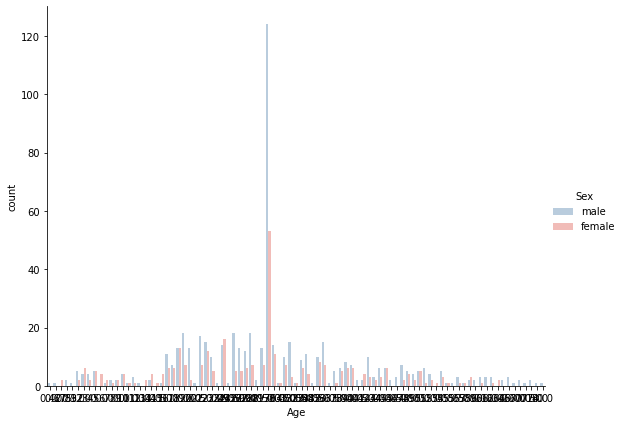

<Figure size 720x360 with 0 Axes>

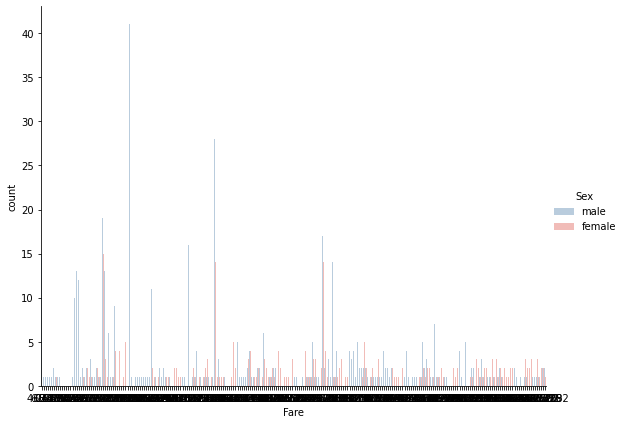

<Figure size 720x360 with 0 Axes>

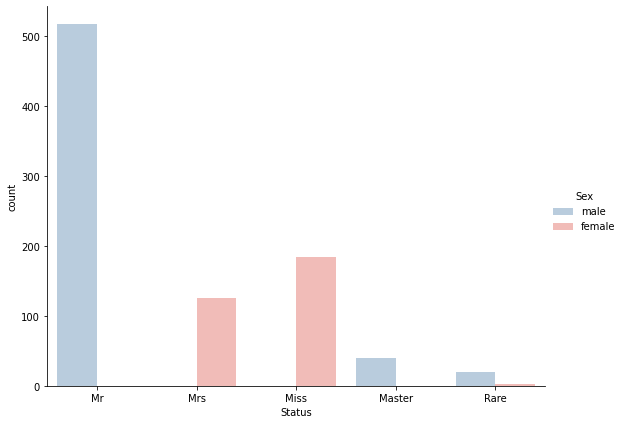

<Figure size 720x360 with 0 Axes>

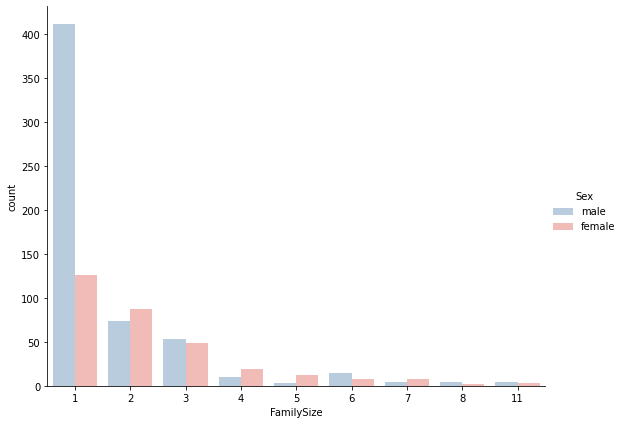

<Figure size 720x360 with 0 Axes>

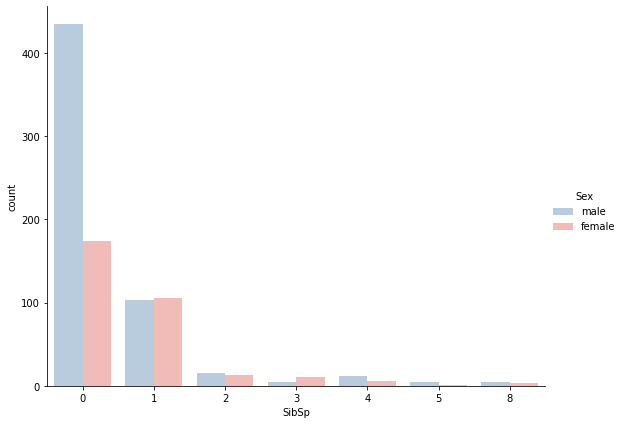

<Figure size 720x360 with 0 Axes>

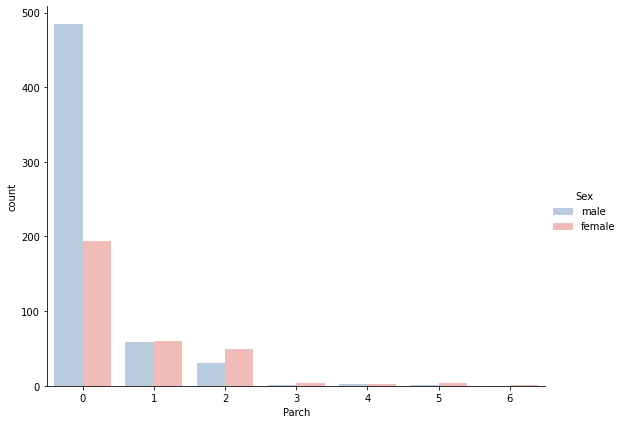

<Figure size 720x360 with 0 Axes>

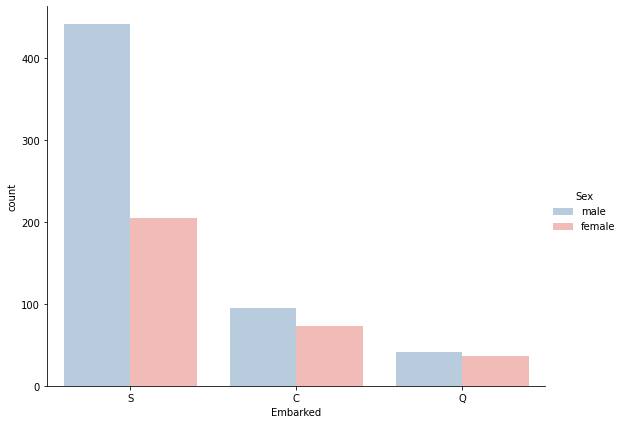

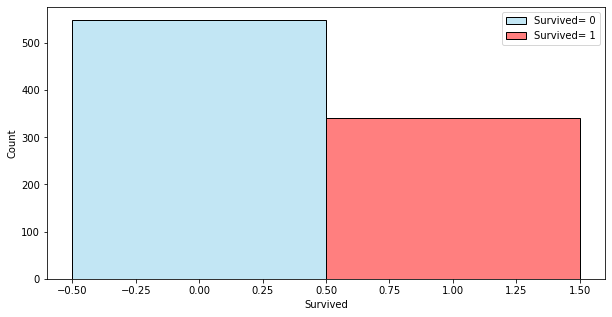

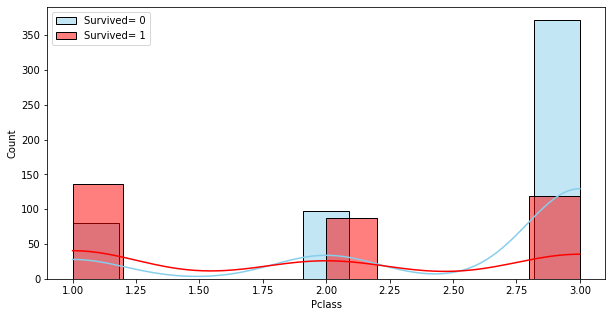

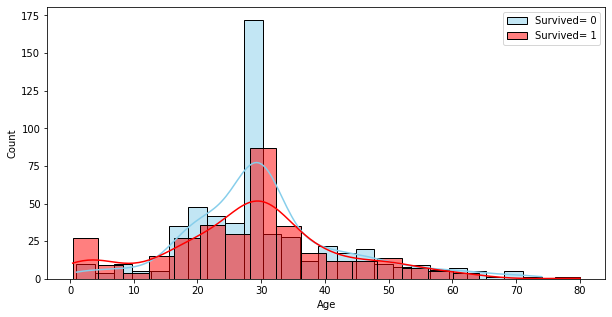

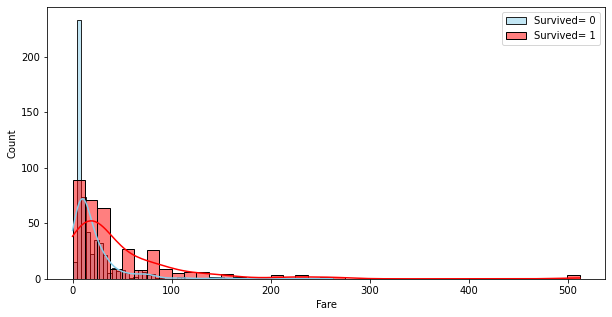

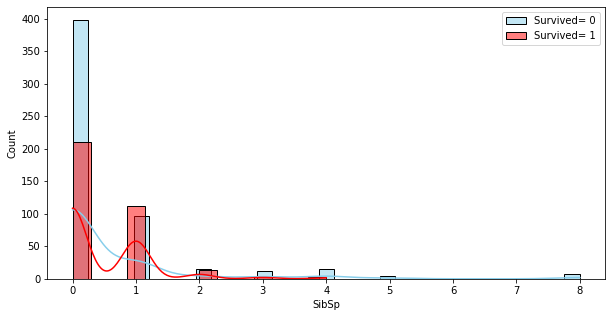

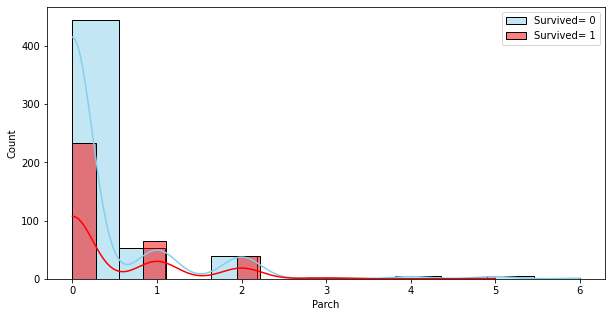

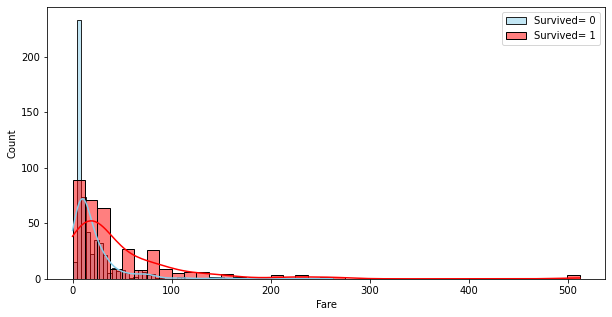

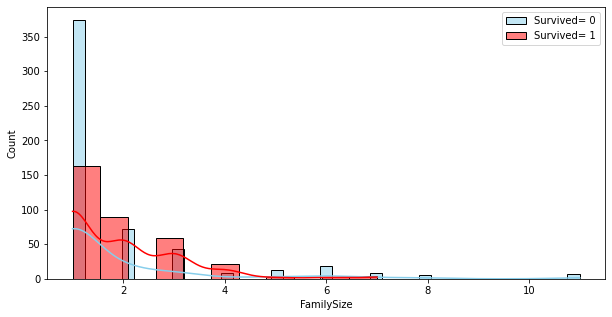

In [9]:
#Data Visualization

columns=['Survived','Pclass', 'Age', 'Fare','SibSp','Parch','Fare','FamilySize']
col=['Survived', 'Pclass', 'Age','Fare','Status','FamilySize','SibSp','Parch', 'Embarked']
for i in columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(train[i])
for i in columns:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(train[i],shade=True,hue=train['Sex'])
for i in columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train,x='Sex',y=train[i])
for i in col:
    plt.figure(figsize=(10, 5))
    sns.catplot(data=train,kind='count',x=i,hue='Sex',height=6, aspect=1.3)
for i in columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=train[train['Survived']==0], x=i,color="skyblue", label="Survived= 0", kde=True)
    sns.histplot(data=train[train['Survived']==1], x=i,color="red", label="Survived= 1", kde=True)
    plt.legend()   
    plt.show()

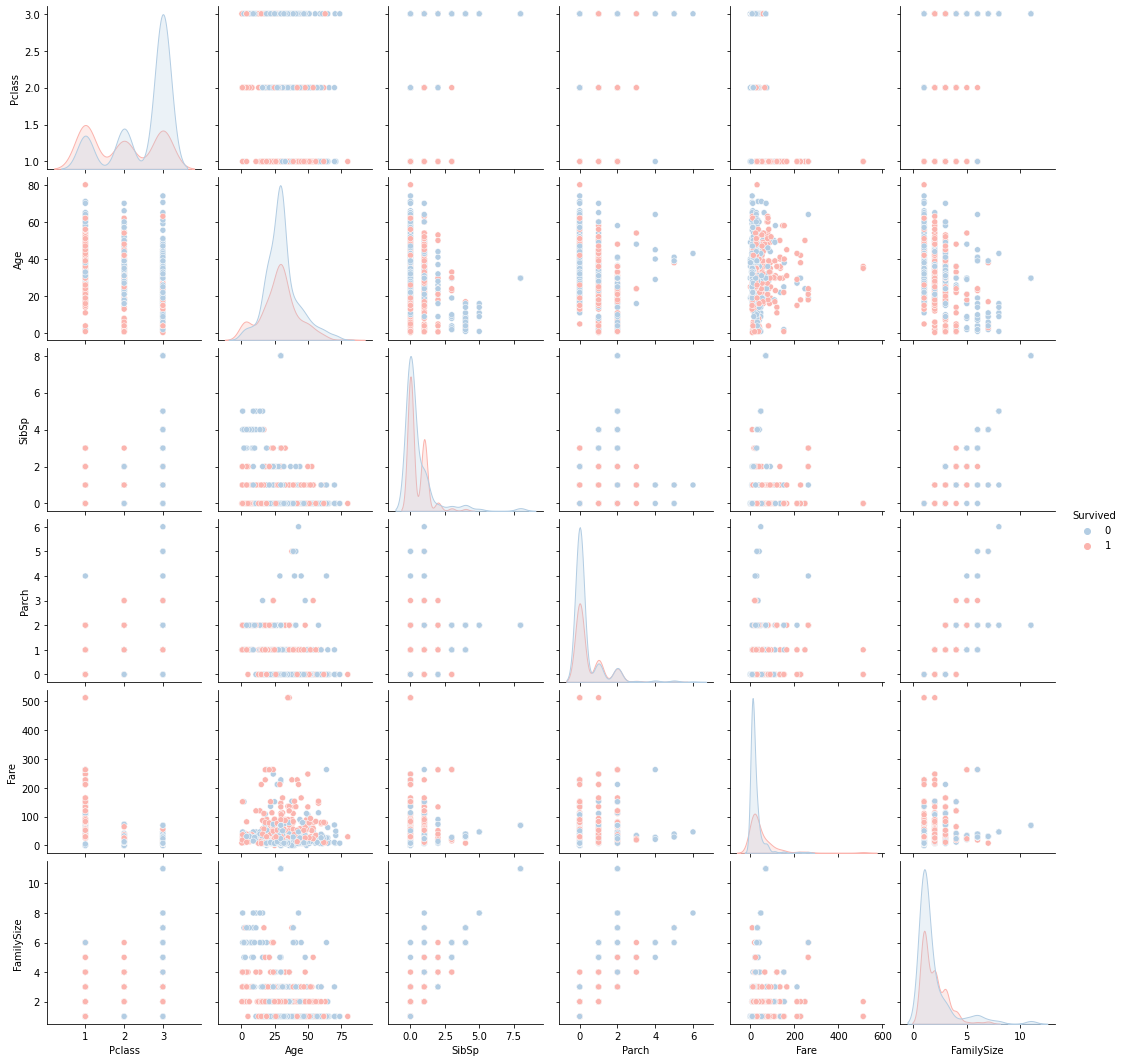

In [10]:
#Data Visualization

sns.pairplot(train,hue='Survived')

In [11]:
from sklearn.preprocessing import StandardScaler

data=[train,test]
scaler=StandardScaler()
for i in data:
    i.Fare = scaler.fit_transform(i.Fare.values.reshape(-1,1))
    i.Age = scaler.fit_transform(i.Age.values.reshape(-1,1))

In [12]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

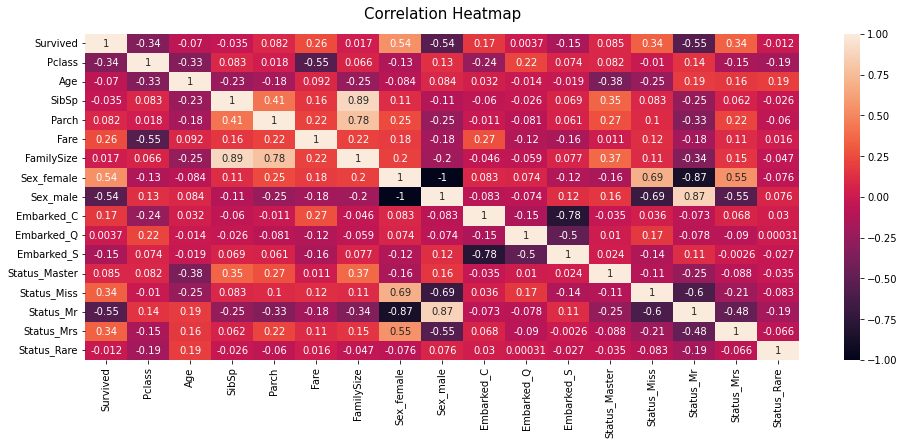

In [13]:
#correlation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=15);

In [14]:
y = train['Survived']
X = train.drop('Survived', axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [16]:
#Modelling and training

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# create classes for classifiers
rf_clf = RandomForestClassifier(random_state=100,criterion='entropy',max_depth= 4,max_features='auto',n_estimators=500)
xg = xgb.XGBClassifier(max_depth=2, n_estimators=200)

# Random Forest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('Random Forest Accuracy : {0:4f}'.format(accuracy_score(y_test, rf_pred)))

#XGB Classifier
xg.fit(X_train, y_train)
xg_preds = xg.predict(X_test)
print('XGBoost Accuracy : {0:4f}'.format(accuracy_score(y_test, xg_preds)))

Random Forest Accuracy : 0.832402
XGBoost Accuracy : 0.849162


<AxesSubplot:title={'center':'Feature Importance XGBoost'}>

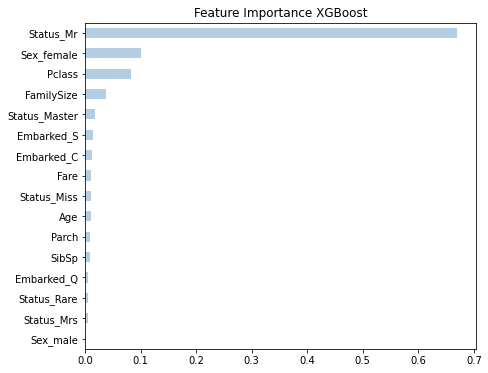

In [22]:
feature_importances = pd.Series(xg.feature_importances_, X_train.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind = "barh",figsize = (7,6),title = 'Feature Importance XGBoost')

In [ ]:
pip install autogluon

In [ ]:
##auto model

from autogluon.tabular import TabularDataset, TabularPredictor
predictor = TabularPredictor(label='Survived',eval_metric='accuracy').fit(train)
predictions = predictor.predict(test)

In [20]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.865922,0.048234,7.149857,0.000900,0.410354,2,True,13
1,LightGBMLarge,0.854749,0.003654,0.983706,0.003654,0.983706,1,True,12
2,NeuralNetFastAI,0.843575,0.021469,2.707737,0.021469,2.707737,1,True,10
3,CatBoost,0.832402,0.002036,0.680952,0.002036,0.680952,1,True,7
4,NeuralNetTorch,0.832402,0.014489,2.554021,0.014489,2.554021,1,True,11
5,LightGBM,0.821229,0.003889,0.485875,0.003889,0.485875,1,True,4
6,LightGBMXT,0.815642,0.003565,1.328676,0.003565,1.328676,1,True,3
7,ExtraTreesEntr,0.782123,0.103669,0.737807,0.103669,0.737807,1,True,9
8,RandomForestGini,0.782123,0.103850,0.840125,0.103850,0.840125,1,True,5
9,RandomForestEntr,0.770950,0.103503,0.740898,0.103503,0.740898,1,True,6


In [21]:
submission['Survived'] = predictor.predict(test)
submission.to_csv('submission.csv', index=False)